---
---

<h1><center><ins>Exercise Sheet 9</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from numpy.polynomial.polynomial import Polynomial
from scipy.special import gammaincc, gamma

# Exercise 1 - Fit a straight line 

The attached data file (```mmr_lg.dat```) contains observations of two quantities (mass and metallicity) measured for a sample of nearby galaxies. This file contains four columns: log10(mass), average metallicity, error on log10(mass) and error on average metallicity. 

*For this exercise, you can neglect the error on the mass, and consider only the one on the metallicity.*

**(A)** Fit a straight line to this dataset. To do this, first write down your model, and define the model parameters you will consider. By using the equations we saw in the lecture, compute:

* the best-fit values for your model parameters
* the uncertainties on the parameters, the covariance and the correlation coefficient $r_{\rm ab}$ on the parameters errors
* the goodness of fit. 

**(B)** Discuss the results you obtained in point (A).

**(C)** Compute the Pearson's correlation coefficient $r$ for this data set. How does it relate to the goodness of fit you recovered above? Is it useful to consider this quantity in this case? Why?

In [47]:
data = np.loadtxt('mmr_lg.dat')
x = data[:,0] #log10 mass
y = data[:,1] #avg metal
sigma_y = data[:,3] #error in avg metal

N = len(x) # number of data points

#sums
S = np.sum(1/sigma_y**2)
Sx = np.sum(x/sigma_y**2)
Sy = np.sum(y/sigma_y**2)
Sxx = np.sum(x**2/sigma_y**2)
Sxy = np.sum(x*y/sigma_y**2)

delta = S*Sxx - Sx**2
a = (Sxx*Sy - Sx*Sxy)/delta
b = (S*Sxy - Sx*Sy)/delta

sigma_a = np.sqrt(Sxx/delta)
sigma_b = np.sqrt(S/delta)
cov_ab = -Sx/delta

r_ab = (-Sx/np.sqrt(S*Sxx))
chi_squared = np.sum(((y - (a * x + b)) / sigma_y)**2)
dof = N - 2 # degrees of freedom

reduced_chi_squared = chi_squared / dof # Reduced chi-squared
Q = gammaincc(dof / 2, chi_squared / 2) # goodness of

print('(A)')
print('Best fit parameters:')
print(f"a = {a:.4f} +/- {sigma_a:.4f}")
print(f"b = {b:.4f} +/- {sigma_b:.4f}")

print(f"Covariance matrix:")
print(f"cov(a,b) = {cov_ab:.4f}\n")
print(f"Correlation coefficient r_ab = {r_ab:.4f}\n")

print(f"Goodness of fit:")
print(f"Chi-squared = {chi_squared:.2f}")
print(f"Degrees of freedom = {dof}")
print(f"Reduced Chi-squared = {reduced_chi_squared:.2f}")
print(f"Q (p-value) = {Q:.10e}")




(A)
Best fit parameters:
a = -3.4503 +/- 0.2717
b = 0.2720 +/- 0.0432
Covariance matrix:
cov(a,b) = -0.0113

Correlation coefficient r_ab = -0.9642

Goodness of fit:
Chi-squared = 75940.62
Degrees of freedom = 17
Reduced Chi-squared = 4467.10
Q (p-value) = 0.0000000000e+00


#### (B)
Linear regression results indicate a slope of −3.4503±0.27 and an intercept of 0.2720±0.04, with a strong negative correlation coefficient (r_ab=−0.964) showing that the parameters are highly anticorrelated. However, the extremely high reduced chi-squared value of 4467.10 reveals that the linear model poorly fits the data.

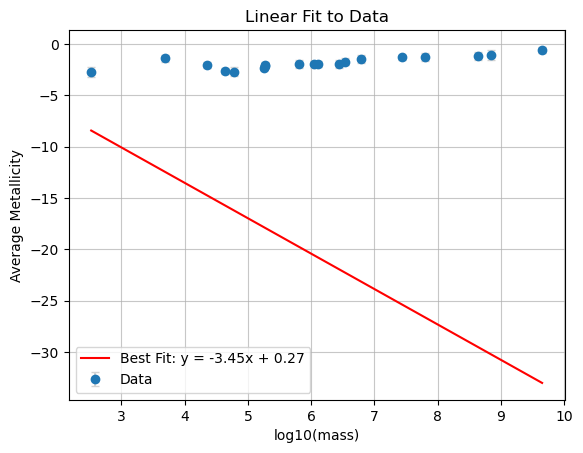

In [48]:
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = a * x_fit + b

plt.errorbar(x, y, yerr=sigma_y, fmt='o', label='Data', ecolor='lightgray', capsize=3)
plt.plot(x_fit, y_fit, 'r-', label=f'Best Fit: y = {a:.2f}x + {b:.2f}')

plt.xlabel('log10(mass)')
plt.ylabel('Average Metallicity')
plt.title('Linear Fit to Data')
plt.legend()
plt.grid(alpha=0.7)
plt.show()


#### (C)

In [49]:
r, p_value = pearsonr(x, y)

print(f"Pearson's correlation coefficient r = {r:.4f}")
print(f"P-value for testing non-correlation = {p_value:.4e}")


Pearson's correlation coefficient r = 0.8267
P-value for testing non-correlation = 1.2780e-05


Pearson's correlation coefficient of 0.8267 indicates a strong positive linear relationship between log₁₀(mass) and average metallicity. However, the Q value being effectively zero, along with the extremely high reduced chi-squared of 4467.10, demonstrates that the linear model does not fit the data well despite the strong correlation, making Pearson's rr less useful on its own in this case.

# Exercise 2 - Familiarize with python built-in functions

**(A)** Take a look at the documentation of the following 3 python built-in functions:

* ```numpy.polynomial.polynomial.Polynomial.fit``` (https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html)
* ```scipy.stats.linregress``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
* ```scipy.optimize.curve_fit``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

Pay attention especially to the quantities and parameters that you need to provide to run these functions, and to those that are returned as result. For each function, provide an answer to the following questions:

1. What possible applications can this function be used for? (e.g.: fit of a straight line to data with errors on the dependent variable)
2. Are the returned quantities providing a full description of the fit? If not, what is missing?

**(B)** Use all the above functions to fit a straight line to the set of data from Exercise 1. What are the results you get for each of these methods? What differences do you find? Compare them also to the ones you obtained in Exercise 1: are there any differences?

**(C)** Fit a parabola to the same dataset. To do this, consider your answers to the questions in point (A) of this exercise, to decide which method to use. Provide all the quantities listed in point (A) of Exercise 1 and discuss the results you obtain, also in comparison to those you obtained when fitting a straight line to the data.

#### Answer: (A)

##### 1. `numpy.polynomial.polynomial.Polynomial.fit`
- *Polynomial Fitting:* Fit polynomial models of arbitrary degrees to datasets.
- *Data Smoothing:* Smooth noisy data using higher-degree polynomials.
- *Trend Analysis:* Identify and analyze trends in data where relationships are non-linear.

Fit Description Completeness:

- *Provided:*
  - Best-fit polynomial coefficients.
  - Scaled domain information.
- *Missing:*
  - Uncertainties or confidence intervals for the coefficients.
  - Goodness-of-fit metrics (e.g., chi-squared, R²).
##### 2. `scipy.stats.linregress`
- *Simple Linear Regression:* Fit a straight line to data with one independent variable.
- *Correlation Analysis:* Assess the strength and direction of a linear relationship between two variables.
- *Quick Statistical Summaries:* Obtain slope, intercept, and key statistical measures for exploratory data analysis.

Fit Description Completeness:
- *Provided:*
  - Slope and intercept of the best-fit line.
  - Pearson's correlation coefficient (\( r \)).
  - P-value for testing non-correlation.
  - Standard error of the slope. 
- *Missing:*
  - Confidence intervals for the slope and intercept.
  - Covariance between slope and intercept.
  - Goodness-of-fit metrics like chi-squared.

##### 3. `scipy.optimize.curve_fit`

- *Custom Model Fitting:* Fit user-defined models (both linear and non-linear) to data.
- *Complex Regression Tasks:* Suitable for multi-parameter and non-linear regression problems.
- *Parameter Estimation:** Extract best-fit parameters for intricate models beyond polynomials.

Fit Description Completeness:
- *Provided:*
  - Best-fit parameter values.
  - Covariance matrix of the parameters.
  
- *Missing:*
  - Direct goodness-of-fit metrics (e.g., chi-squared, R²).
  - Automatic calculation of confidence intervals (requires additional steps).


### (B)

In [57]:
poly = Polynomial.fit(x, y, deg=1)

coef = poly.convert().coef
a_np = coef[1]
b_np = coef[0]

print(f"numpy Polynomial.fit results:")
print(f"\nSlope (a) = {a_np:.4f}")
print(f"Intercept (b) = {b_np:.4f}")

#lin reg
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print(f"\nscipy.stats.linregress results:")
print(f"\nSlope (a) = {slope:.4f} ± {std_err:.4f}")
print(f"Intercept (b) = {intercept:.4f}")
print(f"Pearson's r = {r_value:.4f}")
print(f"P-value = {p_value:.4e}")

# Define linear model
def linear_model(x, a, b):
    return a * x + b

# Perform curve fitting with weights
popt, pcov = curve_fit(linear_model, x, y, sigma=sigma_y, absolute_sigma=True)
a_cf, b_cf = popt
sigma_a_cf, sigma_b_cf = np.sqrt(np.diag(pcov))

print(f"\nscipy.optimize.curve_fit results:")
print(f"\nSlope (a) = {a_cf:.4f} ± {sigma_a_cf:.4f}")
print(f"Intercept (b) = {b_cf:.4f} ± {sigma_b_cf:.4f}")

numpy Polynomial.fit results:

Slope (a) = 0.2651
Intercept (b) = -3.4226

scipy.stats.linregress results:

Slope (a) = 0.2651 ± 0.0438
Intercept (b) = -3.4226
Pearson's r = 0.8267
P-value = 1.2780e-05

scipy.optimize.curve_fit results:

Slope (a) = 0.2720 ± 0.0432
Intercept (b) = -3.4503 ± 0.2717


#### (B)
All 3 methods provide consistent estimates for the slope and intercept, matching the manual fit results.
linregress offers additional statistical information like Pearson's r and p-value, which were not directly provided by the other methods.
Polynomial.fit does not provide uncertainties or goodness-of-fit metrics, whereas curve_fit provides parameter uncertainties through the covariance matrix but lacks direct goodness-of-fit measures.


In [65]:
def parabola(x, a, b, c):
    return a * x**2 + b * x + c

popt, pcov = curve_fit(parabola, x, y, sigma=sigma_y, absolute_sigma=True)
a_cf, b_cf, c_cf = popt
sigma_a_cf, sigma_b_cf, sigma_c_cf = np.sqrt(np.diag(pcov))

cov_ab = pcov[0, 1]
cov_ac = pcov[0, 2]
cov_bc = pcov[1, 2]
corr_ab = cov_ab / (sigma_a_cf * sigma_b_cf)
corr_ac = cov_ac / (sigma_a_cf * sigma_c_cf)
corr_bc = cov_bc / (sigma_b_cf * sigma_c_cf)
chi_squared_par = np.sum(((y - parabola(x, *popt)) / sigma_y) ** 2)
dof_par = len(x) - len(popt)

reduced_chi_squared_par = chi_squared_par / dof_par
Q = gammaincc(dof_par / 2, chi_squared_par / 2)
r_ab_par, _ = pearsonr([a_cf, b_cf], [sigma_a_cf, sigma_b_cf])
r_ac_par, _ = pearsonr([a_cf, c_cf], [sigma_a_cf, sigma_c_cf])
r_bc_par, _ = pearsonr([b_cf, c_cf], [sigma_b_cf, sigma_c_cf])

print("Parabola Fit Results:")
print(f"a = {a_cf:.4f} ± {sigma_a_cf:.4f}")
print(f"b = {b_cf:.4f} ± {sigma_b_cf:.4f}")
print(f"c = {c_cf:.4f} ± {sigma_c_cf:.4f}\n")

print("Covariance Matrix:")
print(f"cov(a,b) = {cov_ab:.4f}")
print(f"cov(a,c) = {cov_ac:.4f}")
print(f"cov(b,c) = {cov_bc:.4f}\n")

print("Correlation Coefficients:")
print(f"r_ab = {corr_ab:.4f}")
print(f"r_ac = {corr_ac:.4f}")
print(f"r_bc = {corr_bc:.4f}\n")

print("Goodness of Fit:")
print(f"Chi-squared = {chi_squared_par:.2f}")
print(f"Degrees of freedom = {dof_par}")
print(f"Reduced Chi-squared = {reduced_chi_squared_par:.2f}")
print(f"Q (p-value) = {Q:.3e}")



Parabola Fit Results:
a = 0.0429 ± 0.0205
b = -0.2827 ± 0.2686
c = -1.7825 ± 0.8421

Covariance Matrix:
cov(a,b) = -0.0054
cov(a,c) = 0.0163
cov(b,c) = -0.2227

Correlation Coefficients:
r_ab = -0.9870
r_ac = 0.9465
r_bc = -0.9842

Goodness of Fit:
Chi-squared = 15.55
Degrees of freedom = 16
Reduced Chi-squared = 0.97
Q (p-value) = 4.848e-01


Parabola Fit: Reduced chi-squared of 0.97 and a Q-value of 0.4848 indicate that the quadratic model fits the data well.
Straight Line Fit: Previously had a reduced chi-squared of 4467.10 and a Q-value effectively 0, showing a poor fit.
This demonstrates that a parabola better captures the underlying trend in your data than a simple linear model

# Exercise 3 - Preparation to MCMC fitting

**(A)** Read the blog entry "*Bayesian inference problem, MCMC and variational inference*" that you can find at this link: https://towardsdatascience.com/bayesian-inference-problem-mcmc-and-variational-inference-25a8aa9bce29

You can skip the part on Variational Inference, but please read carefully the parts on Bayesian inference and MCMC. After reading this text, write a brief answer (in your words!) to each of the following questions:

* What does each of the terms in Bayes' Theorem represent?
* If you had no knowledge about the probability for some event to occur, what type of distribution would you use for the prior?
* If you had new observations about the probability for some event to occur, how would you incorporate this in a Bayesian framework?
* What does MCMC mean? What is it?
* What is the main purpose of MCMC, and how is it related to Bayesian inference?

**(B)** The ```emcee``` package is a python implementation of a MCMC ensemble sampler, and is widely used in astronomy. In this task you will only have to install the packages ```emcee``` and ```corner``` (which is useful for plotting results) on your computer. You should be able to simply use ```pip``` to do that. 

If you need help, you can take a look at the "Installation" section in the webpage containing the documentation of ```emcee```: https://emcee.readthedocs.io/en/stable/. 

When you have installed these packages, run the following cell to make sure that everything went well and that you can indeed import them without errors.

In [66]:
import emcee   #likely need to install with pip first... e.g.,   pip install emcee
import corner  #likely need to install with pip first... e.g.,   pip install corner

**(C)** Please repeat Exercise 2 from Exercise Sheet 8, but this time use the emcee package. Do you get the same result as with your own implementation of an MCMC sampler? What is the difference between the sampler implemented by the emcee package and the Metropolis-Hastings algorithm?